## **Imports**

In [1]:
import os
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

## **Load DataFrame**

In [2]:
df = pd.read_csv('./data/venezia.csv')
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)
df.sort_values(by='datetime', inplace=True, ignore_index=True)
df

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0
...,...,...
289267,2015-12-31 20:00:00,-18.0
289268,2015-12-31 21:00:00,-14.0
289269,2015-12-31 22:00:00,-5.0
289270,2015-12-31 23:00:00,8.0


## **Resample the DataFrame**

In [3]:
df = df.set_index('datetime',drop=True).resample("H").sum().reset_index(drop=False)
df

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0
...,...,...
289267,2015-12-31 20:00:00,-18.0
289268,2015-12-31 21:00:00,-14.0
289269,2015-12-31 22:00:00,-5.0
289270,2015-12-31 23:00:00,8.0


## **Analying Time Increments**

In [4]:
values = df.datetime.values.astype('int64') // 10**9
ranges = values[1:]-values[:-1]
vals, counts = np.unique(ranges, return_counts=True)
print("TIME INCREMENTS")
for val, count in zip(vals, counts):
    print(f"{val} - {count}")

TIME INCREMENTS
3600 - 289271


In [5]:
bad_indecies = [[x, x+1] for x in np.where(ranges!=3600)[0]]
print("BAD INDECIES")
for [idx1, idx2] in bad_indecies:
    print(f"INCREMENT: {values[idx2] - values[idx1]} FROM {idx1}: {df.level.values[idx1]} TO {idx2}: {df.level.values[idx1]}")

BAD INDECIES


In [6]:
df.describe()

,level
count,289272.000000
mean,25.883449
std,29.130838
min,-92.000000
25%,6.000000
50%,27.000000
75%,47.000000
max,159.000000


## **Visualize the Overall Data**

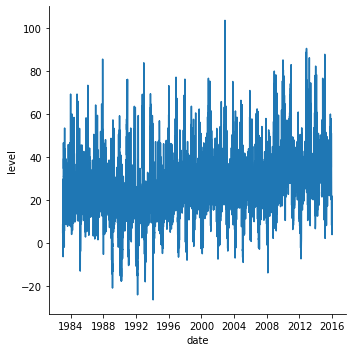

In [7]:
mean_df = df.copy()
mean_df['date'] = mean_df['datetime'].apply(lambda x: datetime(x.year, x.month, x.day))
mean_df = mean_df.groupby('date')[['level']].mean()
sns.relplot(data=mean_df, x="date", y="level", kind="line", legend=True)
plt.show()

## **Visualize the Rolling 365 Day Mean of the Data**

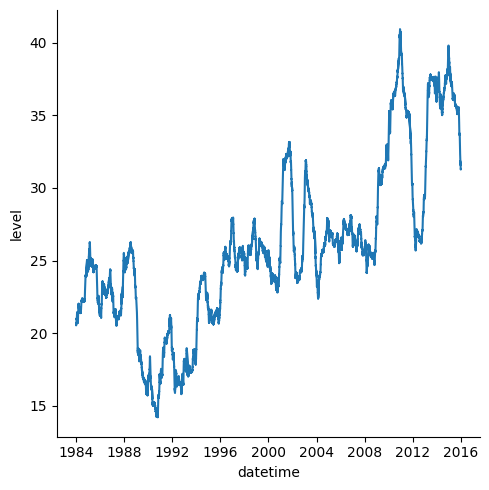

,datetime,level
0,1983-01-01 01:00:00,NaN
1,1983-01-01 02:00:00,NaN
2,1983-01-01 03:00:00,NaN
3,1983-01-01 04:00:00,NaN
4,1983-01-01 05:00:00,NaN
...,...,...
289267,2015-12-31 20:00:00,31.273973
289268,2015-12-31 21:00:00,31.268265
289269,2015-12-31 22:00:00,31.264726
289270,2015-12-31 23:00:00,31.264041


In [8]:
mean_df = df.copy()
mean_df['level'] = mean_df['level'].rolling(24*365).mean()
sns.relplot(data=mean_df, x="datetime", y="level", kind="line", legend=True)
plt.show()
mean_df

## **Visualize the Rolling 365 Day Standard Deviation of the Data**

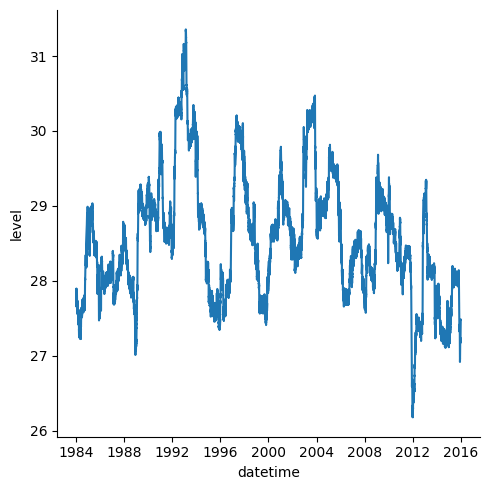

,datetime,level
0,1983-01-01 01:00:00,NaN
1,1983-01-01 02:00:00,NaN
2,1983-01-01 03:00:00,NaN
3,1983-01-01 04:00:00,NaN
4,1983-01-01 05:00:00,NaN
...,...,...
289267,2015-12-31 20:00:00,27.478834
289268,2015-12-31 21:00:00,27.483045
289269,2015-12-31 22:00:00,27.485719
289270,2015-12-31 23:00:00,27.486224


In [9]:
std_df = df.copy()
std_df['level'] = std_df['level'].rolling(24*365).std()
sns.relplot(data=std_df, x="datetime", y="level", kind="line", legend=True)
plt.show()
std_df

## **Visualize the Mean on a Yearly Basis**

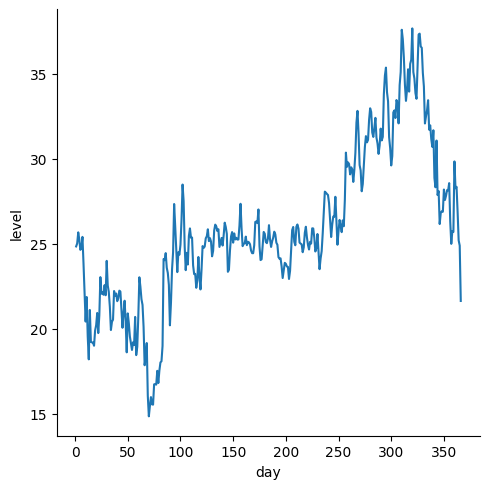

In [10]:
mean_df = df.copy()
mean_df['day'] = mean_df['datetime'].dt.dayofyear
mean_df = mean_df.groupby('day')[['level']].mean()
sns.relplot(data=mean_df, x="day", y="level", kind="line", legend=True)
plt.show()

## **Visualize the Standard Deviation on a Yearly Basis**

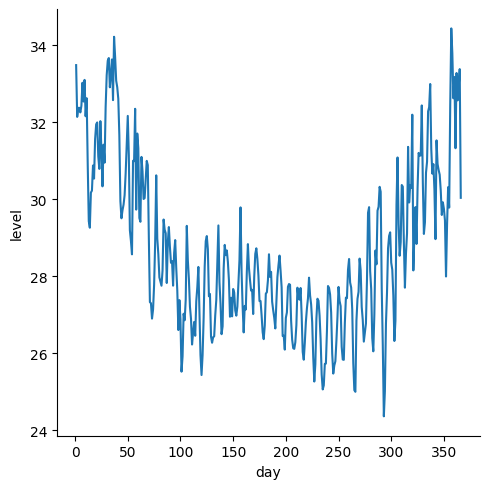

In [11]:
std_df = df.copy()
std_df['day'] = std_df['datetime'].dt.dayofyear
std_df = std_df.groupby('day')[['level']].std()
sns.relplot(data=std_df, x="day", y="level", kind="line", legend=True)
plt.show()

## **Visualize the Mean on a Daily Basis**

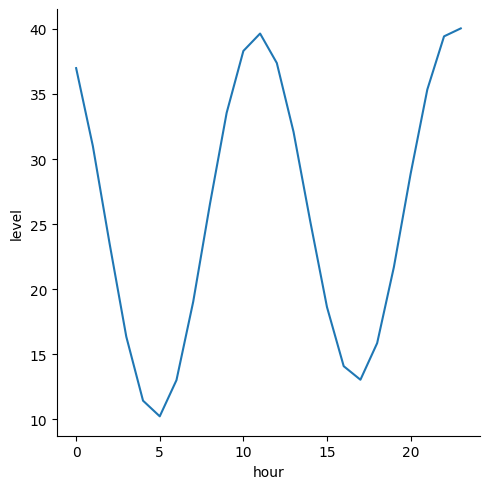

In [12]:
mean_df = df.copy()
mean_df['hour'] = mean_df['datetime'].dt.hour
mean_df = mean_df.groupby('hour')[['level']].mean()
sns.relplot(data=mean_df, x="hour", y="level", kind="line", legend=True)
plt.show()

## **Visualize the Standard Deviation on a Daily Basis**

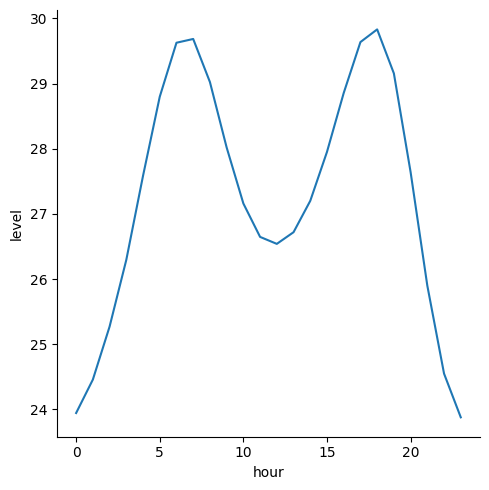

In [13]:
std_df = df.copy()
std_df['hour'] = std_df['datetime'].dt.hour
std_df = std_df.groupby('hour')[['level']].std()
sns.relplot(data=std_df, x="hour", y="level", kind="line", legend=True)
plt.show()

## **Visualize the Distribution of the data**

<AxesSubplot:xlabel='level', ylabel='Count'>

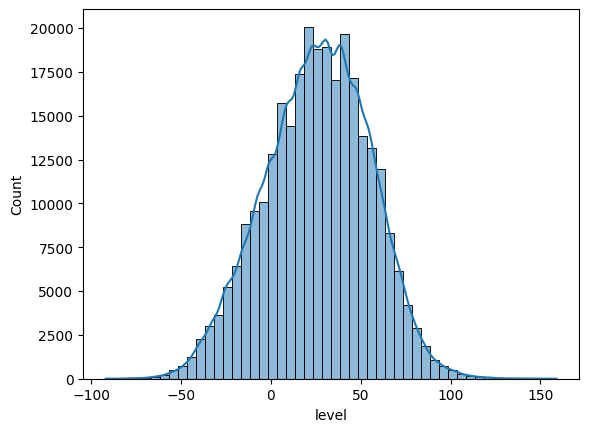

In [14]:
sns.histplot(data=df, x='level', kde=True, bins=50)

In [15]:
# for day_idx, day in enumerate(np.linspace(start=0, stop=365, num=14)[1:-1]):
#         subset[f'rbf_day_{day_idx}'] = subset.day_in_frame.apply(gaussian, value=int(day), period=365.25, alpha=day_alpha)

In [16]:
def gaussian(x, value, period, alpha):
    if x - value <= period / 2:
        return np.exp(- (x - value) ** 2 / (2 * alpha))
    else:
        return np.exp(- (x - value - period) ** 2 / ( 2 * alpha))
    
def radial_basis_kernel(x, point, period, length):
    dist = abs(x - point) % period
    if(dist > period / 2):
        dist = period - dist
    return np.exp(- np.square(dist) / (2 * length))
    
def add_radial_basis_functions(subset, day_alpha=65, hour_alpha=0.5):
    subset['day'] = subset['datetime'].dt.dayofyear
    subset['day_in_frame'] = np.arange(subset.shape[0])
    subset['hour'] = subset['datetime'].dt.hour
    
    for day_idx, day in enumerate(np.linspace(start=0, stop=365, num=14)[1:]):
        subset[f'rbf_day_{day_idx}'] = subset.day.apply(radial_basis_kernel, point=day, period=365.25, length=day_alpha)

#     for order in range(0, 9):
#         subset[f'cos_{order}'] = np.cos(subset['day_in_frame'] * order * 2 * np.pi * (1 / 365.25))
#         subset[f'sin_{order}'] = np.sin(subset['day_in_frame'] * order * 2 * np.pi * (1 / 365.25))
      
    for hour in range(0, 24):
        subset[f'rbf_hour_{hour}'] = subset.hour.apply(gaussian, value=hour, period=12, alpha=hour_alpha)
        
    subset.drop(['day', 'hour', 'day_in_frame'], axis=1, inplace=True)
    return subset

def add_temporal_features(subset):
    subset['day'] = subset['datetime'].dt.dayofyear
    subset['hour'] = subset['datetime'].dt.hour
    subset['cos_day'] = np.cos(2 * np.pi * subset['day'] / 365.25)
    subset['sin_day'] = np.sin(2 * np.pi * subset['day'] / 365.25)
    subset['cos_hour'] = np.cos(2 * np.pi * subset['hour'] / 24)
    subset['sin_hour'] = np.sin(2 * np.pi * subset['hour'] / 24)
    subset.drop(['day', 'hour'], axis=1, inplace=True)
    return subset

df = add_temporal_features(df)
df

,datetime,level,cos_day,sin_day,cos_hour,sin_hour
0,1983-01-01 01:00:00,44.0,0.999852,0.017202,0.965926,0.258819
1,1983-01-01 02:00:00,35.0,0.999852,0.017202,0.866025,0.500000
2,1983-01-01 03:00:00,23.0,0.999852,0.017202,0.707107,0.707107
3,1983-01-01 04:00:00,10.0,0.999852,0.017202,0.500000,0.866025
4,1983-01-01 05:00:00,1.0,0.999852,0.017202,0.258819,0.965926
...,...,...,...,...,...,...
289267,2015-12-31 20:00:00,-18.0,0.999991,-0.004301,0.500000,-0.866025
289268,2015-12-31 21:00:00,-14.0,0.999991,-0.004301,0.707107,-0.707107
289269,2015-12-31 22:00:00,-5.0,0.999991,-0.004301,0.866025,-0.500000
289270,2015-12-31 23:00:00,8.0,0.999991,-0.004301,0.965926,-0.258819


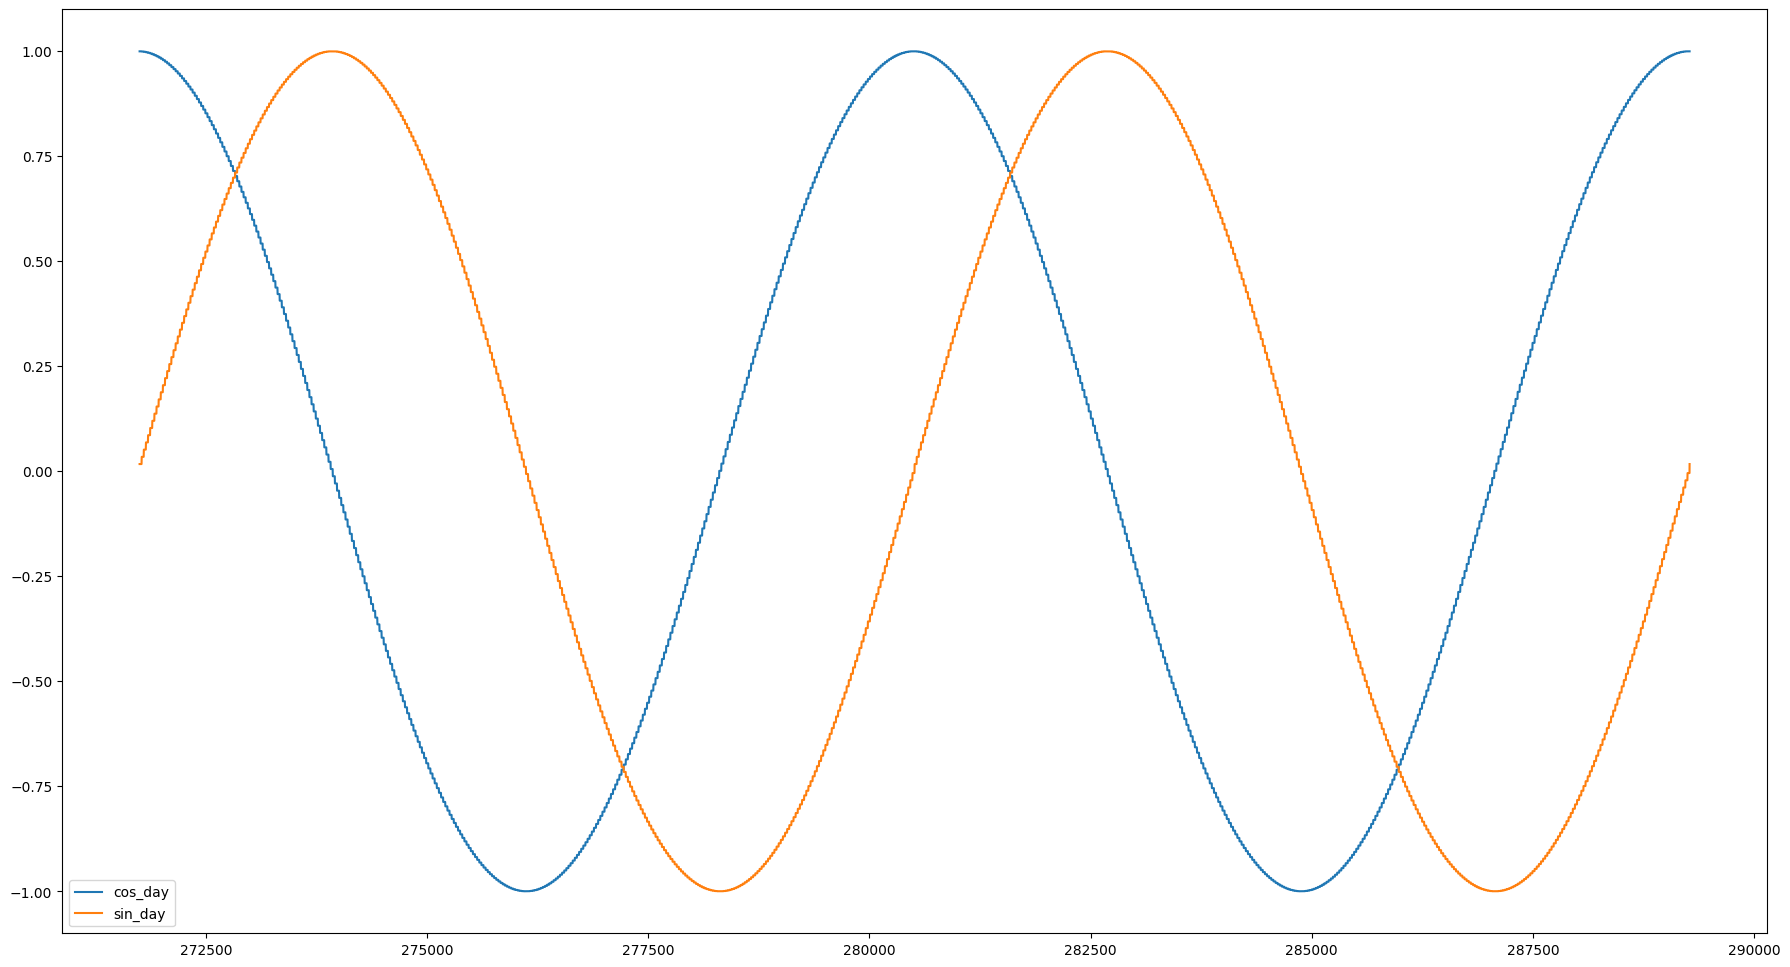

,cos_day,sin_day
271752,0.999852,0.017202
271753,0.999852,0.017202
271754,0.999852,0.017202
271755,0.999852,0.017202
271756,0.999852,0.017202
...,...,...
289267,0.999991,-0.004301
289268,0.999991,-0.004301
289269,0.999991,-0.004301
289270,0.999991,-0.004301


In [17]:
mean_df = df.loc[df['datetime']>datetime(2014,1,1)].drop(['level','datetime'], axis=1).copy()
mean_df = mean_df.drop([x for x in df.columns if 'hour' in x], axis=1)
fig, ax = plt.subplots(1,1,figsize=(22,12))
mean_df.plot(ax=ax)
plt.show()
mean_df

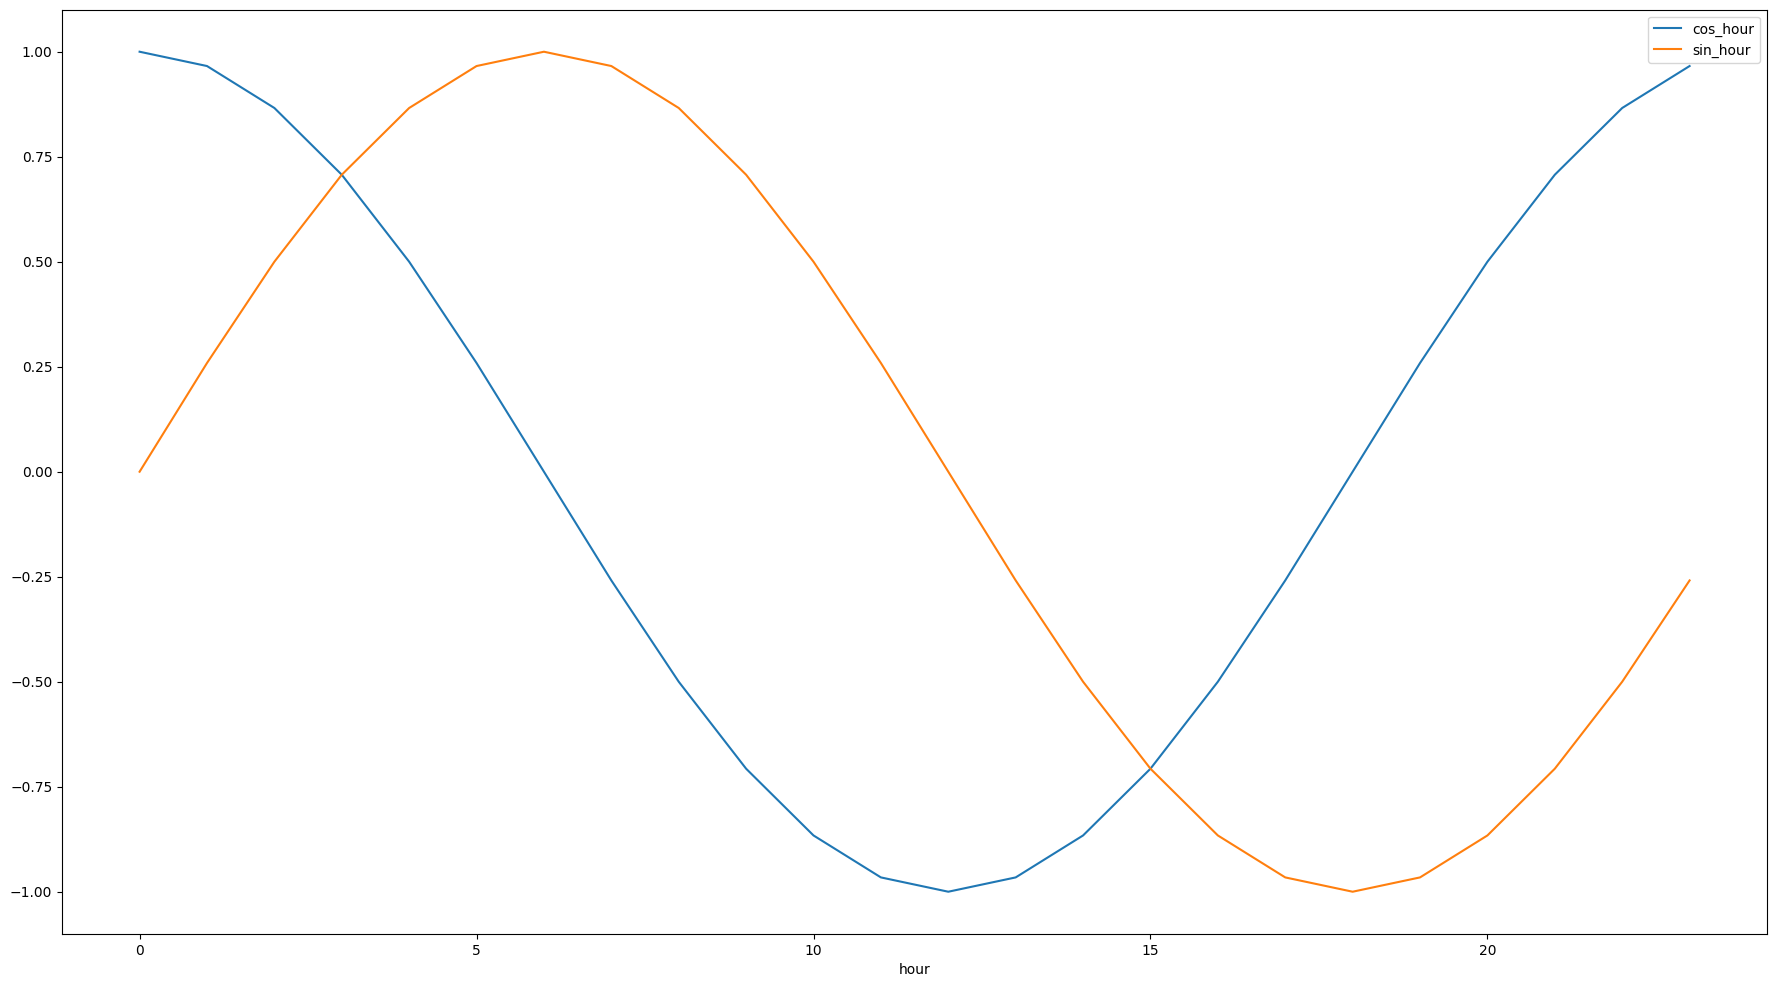

,cos_hour,sin_hour
hour,,
0,1.000000e+00,0.000000e+00
1,9.659258e-01,2.588190e-01
2,8.660254e-01,5.000000e-01
3,7.071068e-01,7.071068e-01
4,5.000000e-01,8.660254e-01
5,2.588190e-01,9.659258e-01
6,6.123234e-17,1.000000e+00
7,-2.588190e-01,9.659258e-01
8,-5.000000e-01,8.660254e-01


In [18]:
mean_df = df.drop('level', axis=1).copy()
mean_df = mean_df.drop([x for x in df.columns if 'day' in x], axis=1)
mean_df['hour'] = mean_df['datetime'].dt.hour
mean_df = mean_df.drop('datetime', axis=1)
mean_df = mean_df.groupby('hour').mean()
fig, ax = plt.subplots(1,1,figsize=(22,12))
mean_df.plot(ax=ax)
plt.show()
mean_df

## **Create Data Splits**

In [19]:
date_splits = [datetime(2004,1,1), datetime(2008,1,1), datetime(2012,1,1)]

train_cuttoff = timedelta(days=5*365.25)
val_cuttoff = timedelta(days=1*365.25)
duration = timedelta(days=365.25)

df = df.reset_index(drop=True)
df = df.set_index('datetime')

In [20]:
feature_indecies = {}
for idx, col in enumerate(df.columns):
    feature_indecies[col] = idx
    
time_cols = [x for x in df.columns if x not in ['datetime','level']]
time_cols_idxs = [feature_indecies[x] for x in time_cols]
feature_indecies

{'level': 0, 'cos_day': 1, 'sin_day': 2, 'cos_hour': 3, 'sin_hour': 4}

In [21]:
N_PRIOR = 24 * 3
N_FORWARD = 24 * 1

In [22]:
df

,level,cos_day,sin_day,cos_hour,sin_hour
datetime,,,,,
1983-01-01 01:00:00,44.0,0.999852,0.017202,0.965926,0.258819
1983-01-01 02:00:00,35.0,0.999852,0.017202,0.866025,0.500000
1983-01-01 03:00:00,23.0,0.999852,0.017202,0.707107,0.707107
1983-01-01 04:00:00,10.0,0.999852,0.017202,0.500000,0.866025
1983-01-01 05:00:00,1.0,0.999852,0.017202,0.258819,0.965926
...,...,...,...,...,...
2015-12-31 20:00:00,-18.0,0.999991,-0.004301,0.500000,-0.866025
2015-12-31 21:00:00,-14.0,0.999991,-0.004301,0.707107,-0.707107
2015-12-31 22:00:00,-5.0,0.999991,-0.004301,0.866025,-0.500000


## **Create Multi-Step Data**

In [23]:
def subset_to_samples(subset, is_forecast=False, dates=None):
    # get the size of the arrays
    N = subset.shape[0]
    # create the arrays
    historical_series, historical_covariates, future_covariates, future_series = [], [], [], []
    train_dates, tracked_dates = None, None
    if(is_forecast):
        train_dates, tracked_dates = [], []
    # iterate over index to get values
    for start_idx in range(0, N-N_PRIOR-N_FORWARD):
        inputs_start, inputs_end, targets_end = start_idx, start_idx+N_PRIOR, start_idx+N_PRIOR+1
        if(is_forecast):
            targets_end = start_idx+N_PRIOR+N_FORWARD
        # get the inputs
        levels = subset[inputs_start:inputs_end, [feature_indecies['level']]]
        time_features = subset[inputs_start:inputs_end, time_cols_idxs]
        # get the targets
        time_targets = subset[inputs_end:targets_end, time_cols_idxs]
        target_samples = subset[inputs_end:targets_end, feature_indecies['level']]
        if(is_forecast):
            train_dates.append(dates[inputs_start:inputs_end])
            tracked_dates.append(dates[inputs_end:targets_end])
        # record the values
        historical_series.append(levels)
        historical_covariates.append(time_features)
        future_covariates.append(time_targets)
        future_series.append(target_samples)
    # concatenate the arrays
    (
        historical_series, 
        historical_covariates, 
        future_covariates, 
        future_series
    ) = np.stack(historical_series), np.stack(historical_covariates), np.stack(future_covariates), np.stack(future_series)
    if(is_forecast):
        tracked_dates = np.stack(tracked_dates)
        train_dates = np.stack(train_dates)
    print(historical_series.shape, historical_covariates.shape, future_covariates.shape, future_series.shape)
    return historical_series, historical_covariates, future_covariates, future_series, tracked_dates, train_dates

for split_idx, split in enumerate(date_splits):
    # get the splits
    test_data = df.loc[(df.index>=split)&(df.index<split+duration)].copy()
    test_dates = test_data.index.values
    test_data = test_data.values
    
    pre_test_data = df.loc[(df.index>=split-val_cuttoff-train_cuttoff)&(df.index<split), ['level']].copy()
    
    val_data = df.loc[(df.index>=split-val_cuttoff-timedelta(hours=N_PRIOR))&(df.index<split)].copy().values
    
    train_data = df.loc[(df.index>=split-val_cuttoff-train_cuttoff)&(df.index<split-val_cuttoff)].copy().values
    # normalize the data
    mean, std = train_data[:, feature_indecies['level']].mean(), train_data[:, feature_indecies['level']].std()
    print(mean, std)
    data_features = np.array([mean, std])
    train_data[:, feature_indecies['level']] = (train_data[:, feature_indecies['level']] - mean) / std
    val_data[:, feature_indecies['level']] = (val_data[:, feature_indecies['level']] - mean) / std    
    test_data[:, feature_indecies['level']] = (test_data[:, feature_indecies['level']] - mean) / std
    # get samples
    (
        train_historical_series, 
        train_historical_covariates, 
        train_future_covariates,
        train_future_series,
        _,_
    ) = subset_to_samples(train_data)
    (
        val_historical_series, 
        val_historical_covariates, 
        val_future_covariates,
        val_future_series,
        _,_
    ) = subset_to_samples(val_data)
    (
        test_historical_series, 
        test_historical_covariates, 
        test_future_covariates,
        test_future_series,
        _,_
    ) = subset_to_samples(test_data)
    (
        forecast_historical_series, 
        forecast_historical_covariates, 
        forecast_future_covariates,
        forecast_future_series,
        forecast_dates,
        historical_dates,
    ) = subset_to_samples(test_data, is_forecast=True, dates=test_dates)
    # save the data to a file
    file_name = f"data/fold_{split_idx}.npy"
    pre_test_data.to_csv(f'data/fold_{split_idx}.csv')
    with open(file_name, mode='wb') as f:
        # train arrays
        np.save(f, train_historical_series, allow_pickle=False)
        np.save(f, train_historical_covariates, allow_pickle=False)
        np.save(f, train_future_covariates, allow_pickle=False)
        np.save(f, train_future_series, allow_pickle=False)
        # val arrays
        np.save(f, val_historical_series, allow_pickle=False)
        np.save(f, val_historical_covariates, allow_pickle=False)
        np.save(f, val_future_covariates, allow_pickle=False)
        np.save(f, val_future_series, allow_pickle=False)
        # test arrays
        np.save(f, test_historical_series, allow_pickle=False)
        np.save(f, test_historical_covariates, allow_pickle=False)
        np.save(f, test_future_covariates, allow_pickle=False)
        np.save(f, test_future_series, allow_pickle=False)
        # forecast arrays
        np.save(f, forecast_historical_series, allow_pickle=False)
        np.save(f, forecast_historical_covariates, allow_pickle=False)
        np.save(f, forecast_future_covariates, allow_pickle=False)
        np.save(f, forecast_future_series, allow_pickle=False)
        np.save(f, forecast_dates, allow_pickle=False)
        np.save(f, historical_dates, allow_pickle=False)
        # data info
        np.save(f, data_features, allow_pickle=False)

26.868309377138946 28.849019634549556
(43734, 72, 1) (43734, 72, 4) (43734, 1, 4) (43734, 1)
(8742, 72, 1) (8742, 72, 4) (8742, 1, 4) (8742, 1)
(8670, 72, 1) (8670, 72, 4) (8670, 1, 4) (8670, 1)
(8670, 72, 1) (8670, 72, 4) (8670, 24, 4) (8670, 24)
26.542619210586356 29.104688774784023
(43734, 72, 1) (43734, 72, 4) (43734, 1, 4) (43734, 1)
(8742, 72, 1) (8742, 72, 4) (8742, 1, 4) (8742, 1)
(8670, 72, 1) (8670, 72, 4) (8670, 1, 4) (8670, 1)
(8670, 72, 1) (8670, 72, 4) (8670, 24, 4) (8670, 24)
30.73084645220169 29.040616759234137
(43734, 72, 1) (43734, 72, 4) (43734, 1, 4) (43734, 1)
(8742, 72, 1) (8742, 72, 4) (8742, 1, 4) (8742, 1)
(8670, 72, 1) (8670, 72, 4) (8670, 1, 4) (8670, 1)
(8670, 72, 1) (8670, 72, 4) (8670, 24, 4) (8670, 24)


## **Display Levels**

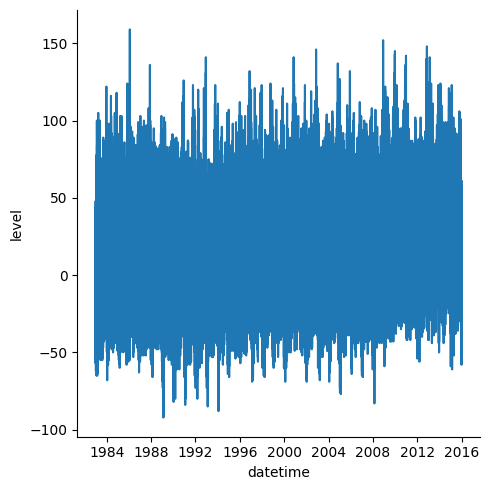

In [24]:
sns.relplot(data=df, x="datetime", y="level", kind="line", legend=True)

In [25]:
# def subset_to_samples(subset):
#     # get the size of the arrays
#     N = subset.shape[0]
#     # create the arrays
#     historical_series, historical_covariates, future_covariates, future_series = [], [], [], []
#     # iterate over index to get values
#     for start_idx in range(0, N-N_PRIOR-N_FORWARD):
#         # get the inputs
#         levels = subset[start_idx:start_idx+N_PRIOR, [feature_indecies['level']]]
#         time_features = subset[start_idx+1:start_idx+1+N_PRIOR, time_cols_idxs]
#         # get the targets
#         time_targets = subset[start_idx+1+N_PRIOR:start_idx+N_PRIOR+N_FORWARD, time_cols_idxs]
#         target_samples = subset[start_idx+N_PRIOR:start_idx+N_PRIOR+N_FORWARD, feature_indecies['level']]
#         # record the values
#         historical_series.append(levels)
#         historical_covariates.append(time_features)
#         future_covariates.append(time_targets)
#         future_series.append(target_samples)
#     # concatenate the arrays
#     (
#         historical_series, 
#         historical_covariates, 
#         future_covariates, 
#         future_series
#     ) = np.stack(historical_series), np.stack(historical_covariates), np.stack(future_covariates), np.stack(future_series)
#     print(historical_series.shape, historical_covariates.shape, future_covariates.shape, future_series.shape)
#     return historical_series, historical_covariates, future_covariates, future_series

# for split_idx, split in enumerate(date_splits):
#     # get the splits
#     test_data = df.loc[(df.index>=split)&(df.index<split+duration)].copy()
#     test_dates = test_data.index.values
#     test_data = test_data.values
#     pre_test_data = df.loc[(df.index>=split-val_cuttoff-train_cuttoff)&(df.index<split)].copy()
#     val_data = df.loc[(df.index>=split-val_cuttoff-timedelta(hours=N_PRIOR))&(df.index<split)].copy().values
#     train_data = df.loc[(df.index>=split-val_cuttoff-train_cuttoff)&(df.index<split-val_cuttoff)].copy().values
#     # normalize the data
#     mean, std = train_data[:, feature_indecies['level']].mean(), train_data[:, feature_indecies['level']].std()
#     data_features = np.array([mean, std])
#     train_data[:, feature_indecies['level']] = (train_data[:, feature_indecies['level']] - mean) / std
#     val_data[:, feature_indecies['level']] = (val_data[:, feature_indecies['level']] - mean) / std    
#     test_data[:, feature_indecies['level']] = (test_data[:, feature_indecies['level']] - mean) / std
#     # get samples
#     (
#         train_historical_series, 
#         train_historical_covariates, 
#         train_future_covariates,
#         train_future_series
#     ) = subset_to_samples(train_data)
#     (
#         val_historical_series, 
#         val_historical_covariates, 
#         val_future_covariates,
#         val_future_series
#     ) = subset_to_samples(val_data)
#     (
#         test_historical_series, 
#         test_historical_covariates, 
#         test_future_covariates,
#         test_future_series
#     ) = subset_to_samples(test_data)
#     # save the data to a file
#     file_name = f"lagged_data/fold_{split_idx}.npy"
#     pre_test_data.to_csv(f'lagged_data/fold_{split_idx}.csv')
#     with open(file_name, mode='wb') as f:
#         # train arrays
#         np.save(f, train_historical_series, allow_pickle=False)
#         np.save(f, train_historical_covariates, allow_pickle=False)
#         np.save(f, train_future_covariates, allow_pickle=False)
#         np.save(f, train_future_series, allow_pickle=False)
#         # val arrays
#         np.save(f, val_historical_series, allow_pickle=False)
#         np.save(f, val_historical_covariates, allow_pickle=False)
#         np.save(f, val_future_covariates, allow_pickle=False)
#         np.save(f, val_future_series, allow_pickle=False)
#         # test arrays
#         np.save(f, test_historical_series, allow_pickle=False)
#         np.save(f, test_historical_covariates, allow_pickle=False)
#         np.save(f, test_future_covariates, allow_pickle=False)
#         np.save(f, test_future_series, allow_pickle=False)
#         # data info
#         np.save(f, data_features, allow_pickle=False)

#         features_start = start_idx
#         features_end = start_idx+N_PRIOR
#         future_features_end = start_idx+N_PRIOR+N_FORWARD
#         future_covariates_end = start_idx+N_PRIOR+N_FORWARD
#         if(shift):
#             covariates_start = start_idx + 1
#             covariates_end = start_idx+N_PRIOR+1
#         else:
#             covariates_start = start_idx
#             covariates_end = start_idx+N_PRIOR